In [1]:
from news_signals import signals
import json
import copy
import requests

# utility function for getting a wikidata id from an entity name

WIKIDATA_SEARCH_URL = "https://www.wikidata.org/w/api.php"
DEFAULT_SEARCH_PARAMS = {
    "action": "wbsearchentities",
    "format": "json",
    "errorformat": "plaintext",
    "language": "en",
    "uselang": "en",
    "type": "item",
    "limit": 1
}
WD_ENTITY_BASE_URL = 'https://www.wikidata.org/wiki/Special:EntityData'
    

def search_wikidata(surface_form, min_length=3):
    params = copy.deepcopy(DEFAULT_SEARCH_PARAMS)
    params["search"] = surface_form
    result = []
    try:
        print(f'querying wikidata with params: {params}')
        r = requests.get(url=WIKIDATA_SEARCH_URL, params=params)
        data = json.loads(r.text)
        if 'search' in data:
            result = data['search']
            result = result[0:min(100, len(result))]
    except Exception as e:
        print(f'Error searching wikidata for surface form: {surface_form}')
        print(e)
    return result

In [2]:
# let's setup the entity we want to work with

entity_name = 'Rishi Sunak'

entity = search_wikidata(entity_name)[0]
wikidata_id = entity['id']
print(entity['description'])
print(entity['id'])

querying wikidata with params: {'action': 'wbsearchentities', 'format': 'json', 'errorformat': 'plaintext', 'language': 'en', 'uselang': 'en', 'type': 'item', 'limit': 1, 'search': 'Rishi Sunak'}
Prime Minister of the United Kingdom since 2022
Q20055561


In [3]:
signal = signals.AylienSignal(
    name=entity_name,
    params={"entity_ids": [wikidata_id]}
)

In [9]:
start = '2023-01-01'
end = '2023-11-16'
ts_signal = signal(start, end)

<Axes: xlabel='date'>

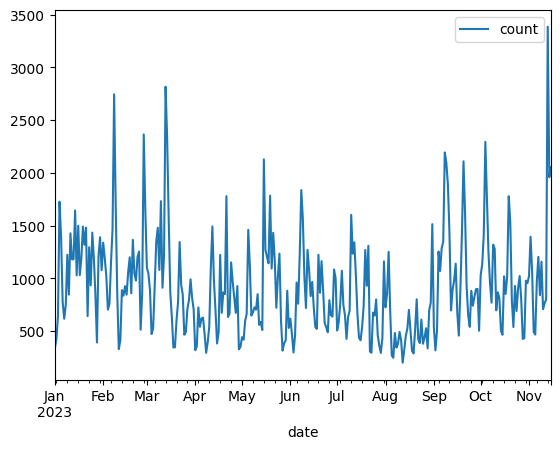

In [10]:
ts_signal.plot()

In [11]:
ts_signal.add_wikipedia_current_events()

,count,published_at
date,,
2023-01-01 00:00:00+00:00,336,2023-01-01T00:00:00Z
2023-01-02 00:00:00+00:00,422,2023-01-02T00:00:00Z
2023-01-03 00:00:00+00:00,643,2023-01-03T00:00:00Z
2023-01-04 00:00:00+00:00,1727,2023-01-04T00:00:00Z
2023-01-05 00:00:00+00:00,1394,2023-01-05T00:00:00Z
...,...,...
2023-11-11 00:00:00+00:00,764,2023-11-11T00:00:00Z
2023-11-12 00:00:00+00:00,800,2023-11-12T00:00:00Z
2023-11-13 00:00:00+00:00,3386,2023-11-13T00:00:00Z


In [16]:
ts_signal.feeds_df[~ts_signal.feeds_df['wikipedia_current_events'].isna()]

,timestamp,wikipedia_current_events
2023-01-14 00:00:00+00:00,2023-01-14 00:00:00+00:00,{'text': 'UK Prime Minister Rishi Sunak confir...
2023-01-14 00:00:00+00:00,2023-01-14 00:00:00+00:00,{'text': 'Iran announces the execution of dual...
2023-01-20 00:00:00+00:00,2023-01-20 00:00:00+00:00,{'text': 'UK Prime Minister Rishi Sunak is fin...
2023-01-29 00:00:00+00:00,2023-01-29 00:00:00+00:00,{'text': 'UK prime minister Rishi Sunak dismis...
2023-02-07 00:00:00+00:00,2023-02-07 00:00:00+00:00,{'text': 'British Prime Minister Rishi Sunak c...
2023-02-08 00:00:00+00:00,2023-02-08 00:00:00+00:00,{'text': 'Ukrainian president Volodymyr Zelens...
2023-02-27 00:00:00+00:00,2023-02-27 00:00:00+00:00,{'text': 'UK Prime Minister Rishi Sunak and Eu...
2023-05-15 00:00:00+00:00,2023-05-15 00:00:00+00:00,{'text': 'Ukrainian President Volodymyr Zelens...
2023-05-25 00:00:00+00:00,2023-05-25 00:00:00+00:00,{'text': 'Police arrest a man after he crashed...
2023-06-07 00:00:00+00:00,2023-06-07 00:00:00+00:00,{'text': 'Prime Minister Rishi Sunak announces...
